Topic:        Challenge Set 6  
Subject:      Linear Regression and Learning Curve challenges  
Date:         01/29/2018  
Name:         Christine Chen  

**Challenge 1**

Generate (fake) data that is linearly related to log(x).  
You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)  
Simulate some data from this model.  
Then fit two models to it:  
 * quadratic (second degree polynomial)  
 * logarithmic (log(x))  
(The second one should fit really well, since it has the same form as the underlying model!)

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import random
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [7]:
def f(x):
    return 5+10*np.log(x)

x_plot=np.linspace(0,1,100)

n_samples=100
X=np.random.uniform(0,50,size=n_samples)[:,np.newaxis]
y=f(X)+np.random.normal(scale=0.3,size=n_samples)[:,np.newaxis]

In [8]:
#log fit
lr=make_pipeline(FunctionTransformer(np.log),LinearRegression(fit_intercept=False))
lr.fit(X,y)

Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

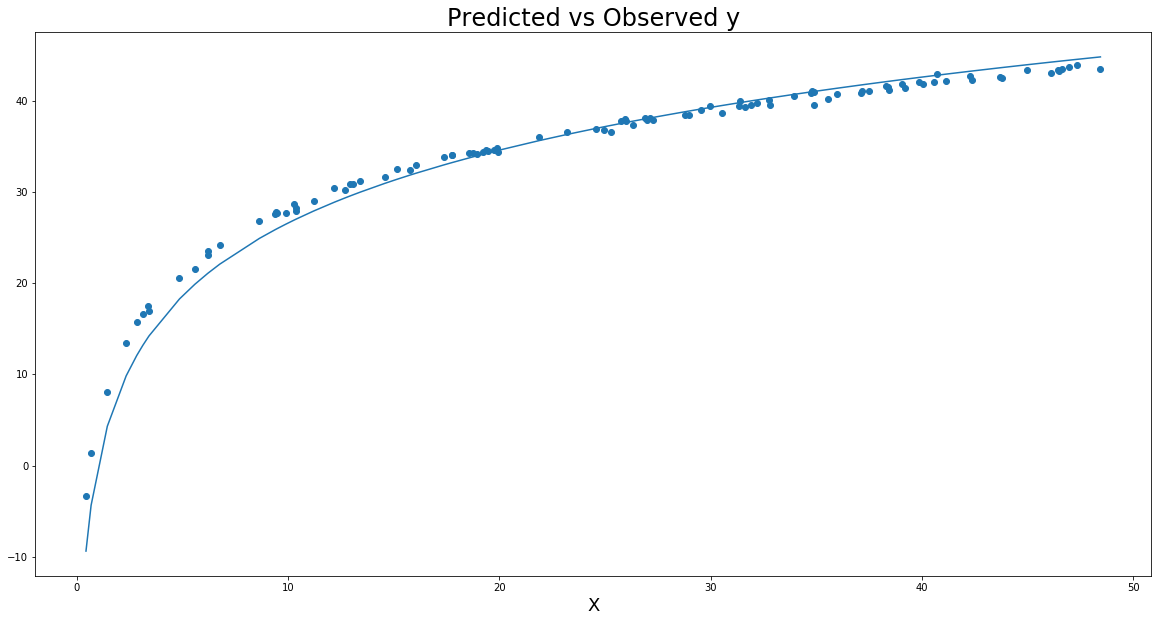

In [9]:
plt.figure(figsize=(20,10))

plt.scatter(X,y)
plt.plot(sorted(X),sorted(lr.predict(X)))
plt.xlabel('X',fontsize=18)
plt.title('Predicted vs Observed y',fontsize=24)

In [10]:
#quadratic (second degree polynomial)
degree=2
#generate 2nd degree polynomial features in the input features and then run a linear regression on the resulting features
est=make_pipeline(PolynomialFeatures(degree),LinearRegression(fit_intercept=False))
est.fit(X,y)
est.predict(X)

array([[ 42.29858494],
       [ 41.35016544],
       [ 12.20462119],
       [ 25.48160658],
       [ 28.88918154],
       [ 40.98274521],
       [ 38.6769114 ],
       [ 40.03677027],
       [ 21.16740259],
       [ 36.18599012],
       [ 41.42533129],
       [ 24.45473774],
       [ 42.27449652],
       [ 32.64281048],
       [ 42.25102753],
       [ 20.4375481 ],
       [ 25.57567722],
       [ 34.59569606],
       [ 15.79015178],
       [ 40.51888294],
       [ 41.07284991],
       [ 42.30264531],
       [ 41.20938828],
       [ 13.74033668],
       [ 41.71551122],
       [ 41.00850664],
       [ 41.95880983],
       [ 42.19553773],
       [ 38.13645539],
       [ 42.22572934],
       [ 41.99537997],
       [ 40.1250613 ],
       [ 27.59619115],
       [ 24.54691163],
       [ 16.6338322 ],
       [ 38.8755446 ],
       [ 32.98157164],
       [ 34.32506808],
       [ 34.38186588],
       [ 42.30052902],
       [ 30.60432878],
       [ 15.06213565],
       [ 41.34342386],
       [ 30

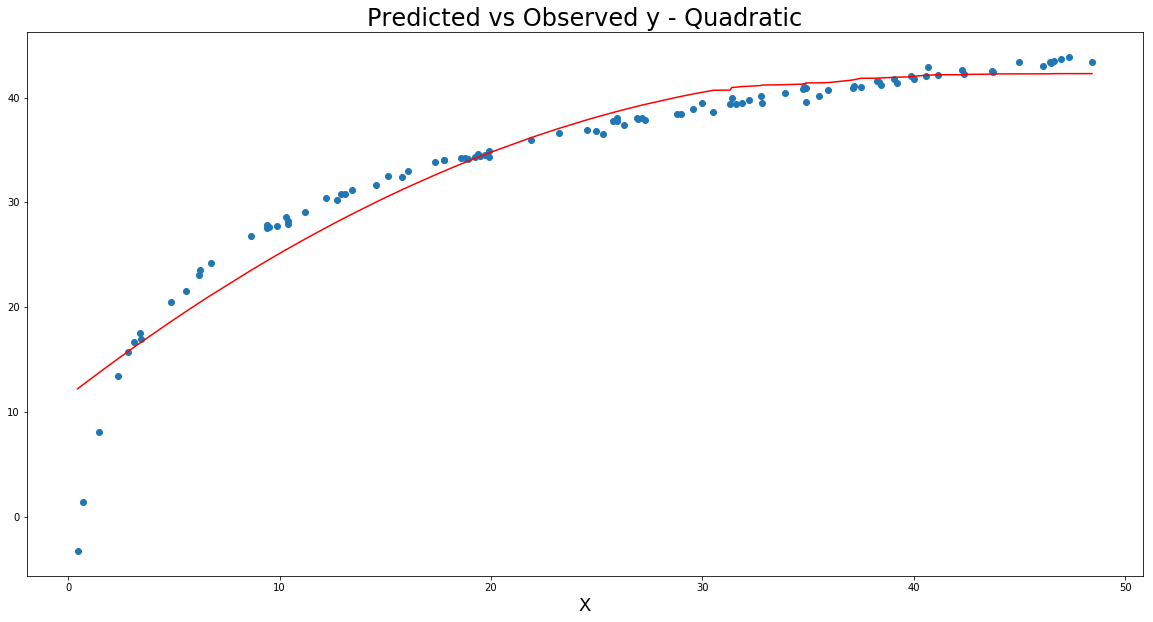

In [11]:
plt.figure(figsize=(20,10))

plt.scatter(X,y)
plt.plot(sorted(X),sorted(est.predict(X)),color='red')
plt.xlabel('X',fontsize=18)
plt.title('Predicted vs Observed y - Quadratic',fontsize=24)

**Challenge 2**

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)  
Split the data into a training and test set.  
Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.  
(You could use sklearn.metrics.mean_squared_error.)

In [12]:
def f(x):
    return 5+10*x+15*x*x

x_plot=np.linspace(0,1,100)

n_samples=100
X=np.random.uniform(0,50,size=n_samples)[:,np.newaxis]
y=f(X)+np.random.normal(scale=0.3,size=n_samples)[:,np.newaxis] 

degree=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr2=make_pipeline(PolynomialFeatures(degree),LinearRegression(fit_intercept=False))
lr2.fit(X_train, y_train)
train_mse=mean_squared_error(y_train,lr2.predict(X_train))
test_mse=mean_squared_error(y_test,lr2.predict(X_test))

print(train_mse)
print(test_mse)

0.0668402156292
0.111329862257


**Challenge 3**

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [13]:
trainingerror=[]
testerror=[]
rsquared=[]
aic=[]
for degree in range(0,8):
    est=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    est.fit(X_train,y_train)
    train_mse=mean_squared_error(y_train,est.predict(X_train))
    test_mse=mean_squared_error(y_test,est.predict(X_test))
    trainingerror.append(train_mse)
    testerror.append(test_mse)
    rsquared.append(est.score(X_test,y_test))
    residual=y_test-est.predict(X_test)
    sse=sum(residual**2)
    aic.append(2-2*np.log(sse))

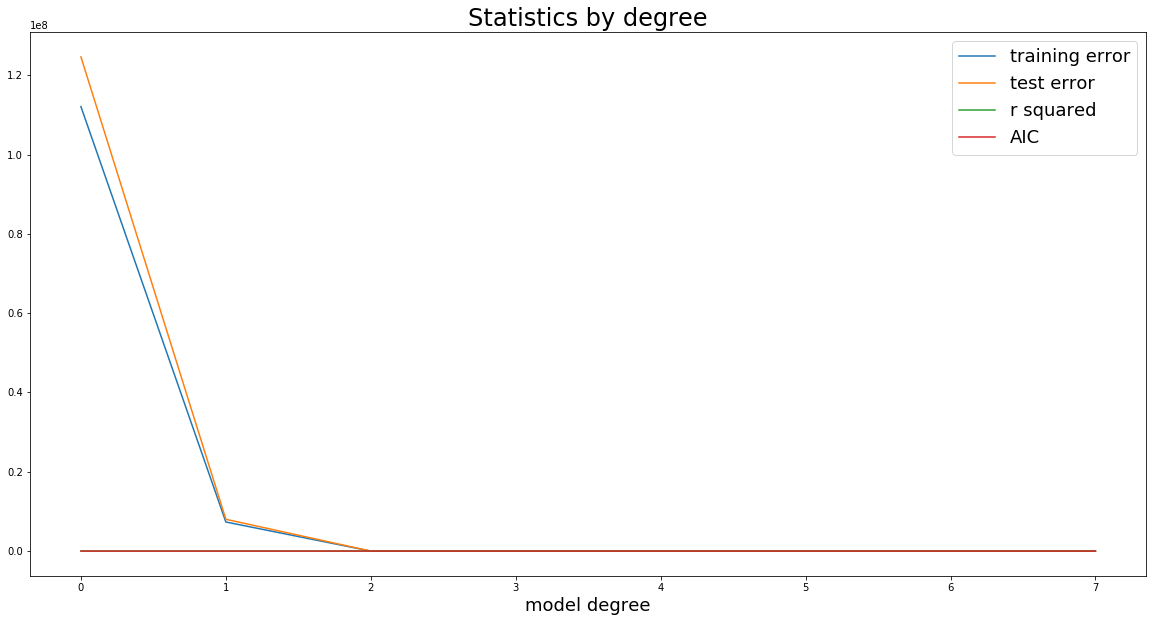

In [14]:
plt.figure(figsize=(20,10))
plt.plot(trainingerror,label='training error')
plt.plot(testerror,label='test error')
plt.plot(rsquared,label='r squared')
plt.plot(aic,label='AIC')
plt.xlabel('model degree',fontsize=18)
plt.title('Statistics by degree',fontsize=24)
plt.legend(fontsize=18)

**Challenge 4**

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [57]:
m=range(5,100,5)

trainingerror=[]
testerror=[]

n_samples=100
X=np.random.uniform(0,50,size=n_samples)[:,np.newaxis]
y=f(X)+np.random.normal(scale=0.3,size=n_samples)[:,np.newaxis]

degree=2

for i in range(5,100,5):

    Xsubset=X[:i]
    ysubset=y[:i]
    X_train, X_test, y_train, y_test = train_test_split(Xsubset, ysubset, test_size=0.3)
    est=make_pipeline(PolynomialFeatures(2),LinearRegression())
    est.fit(X_train,y_train)
    train_mse=mean_squared_error(y_train,est.predict(X_train))
    test_mse=mean_squared_error(y_test,est.predict(X_test))
    trainingerror.append(train_mse)
    testerror.append(test_mse)

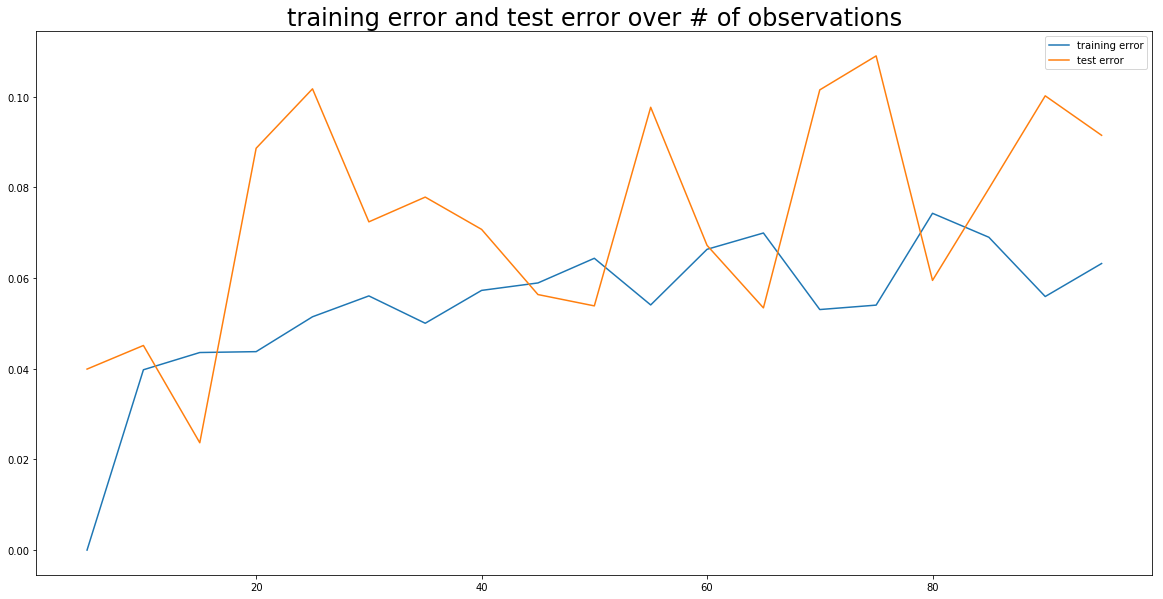

In [58]:
plt.figure(figsize=(20,10))

plt.plot(m,trainingerror,label='training error')
plt.plot(m,testerror,label='test error')
plt.legend()
plt.title('training error and test error over # of observations',fontsize=24)